In [ ]:
# 2023-08
# Terdragon fractal "puzzle piece" design
# for laser cutter

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# COOL SHIT STARTS HERE

In [44]:
def flip(c):
    if c == 'L':
        return 'R'
    elif c == 'R':
        return 'L'
    else:
        return c
def next_ter(ter):
    return ter + 'R' + ''.join(reversed([flip(c) for c in ter]))

In [104]:
size = 5

ter = 'F'
for _ in range(size):
    ter = next_ter(ter)

In [105]:
def rot(vec, th=np.pi/3, flip=False):
    if flip:
        th *= -1
    return [vec[0]*np.cos(th) - vec[1]*np.sin(th), 
            vec[1]*np.cos(th) + vec[0]*np.sin(th)]

In [106]:
turt = np.array([0, 0])
head = np.array([1, 0])
points = [turt]

for step in (ter+'RR'+ter):
    if step == 'F':
        turt = turt + head
        points.append(turt)
    elif step == 'L':
        head = rot(head)
    elif step == 'R':
        head = rot(head, flip=True)

In [107]:
from IPython.display import SVG, display

In [108]:
minx = min([pt[0] for pt in points])
miny = min([pt[1] for pt in points])
maxx = max([pt[0] for pt in points])
maxy = max([pt[1] for pt in points])

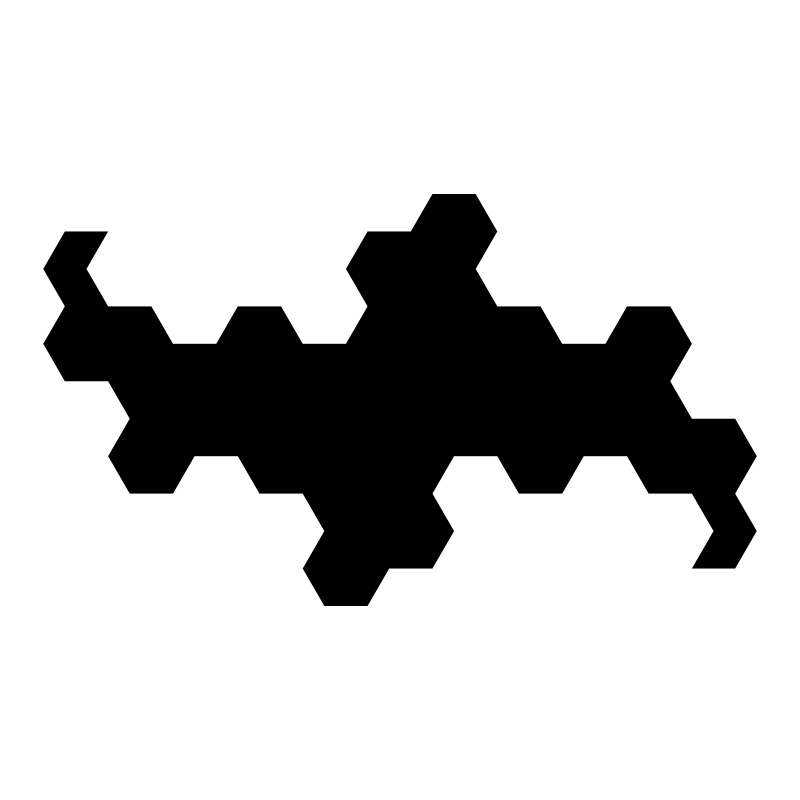

In [109]:
edictsvg = f"""\
<svg width="800" height="800" viewBox="{minx-1} {miny-1} {maxx-minx+2} {maxy-miny+2}">
<polyline points="{' '.join([f'{pt[0]},{pt[1]}' for pt in points])}"/>
</svg>"""
display(SVG(data=edictsvg))

In [110]:
with open(f'/home/adam/Dropbox/personal/projects/ipy/lasers/terdragon{size}.svg', 'w') as f:
    f.write(edictsvg)